In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


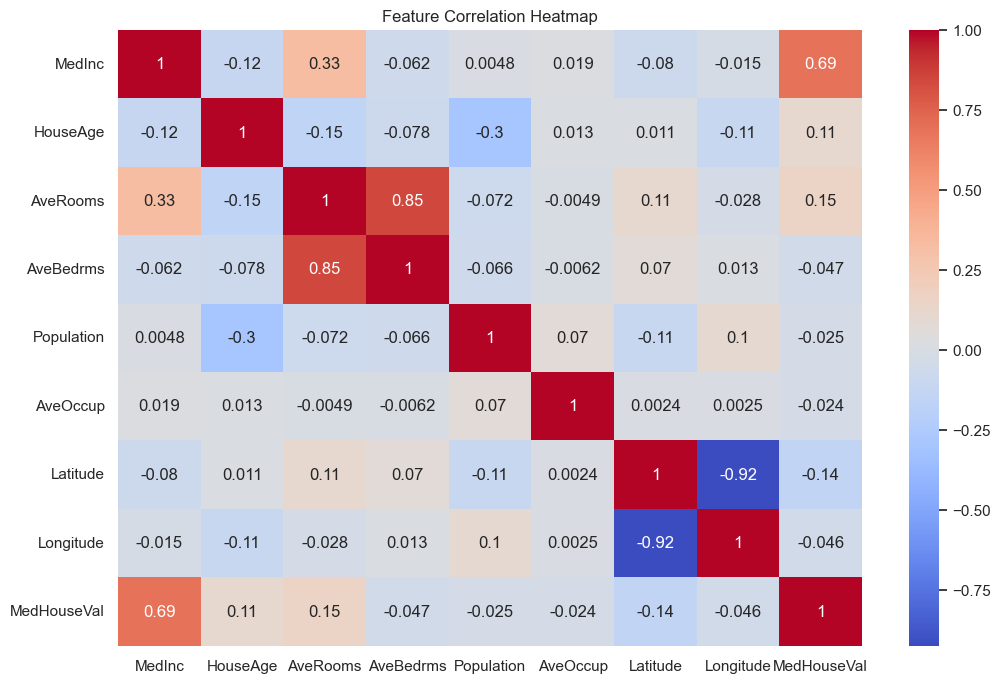

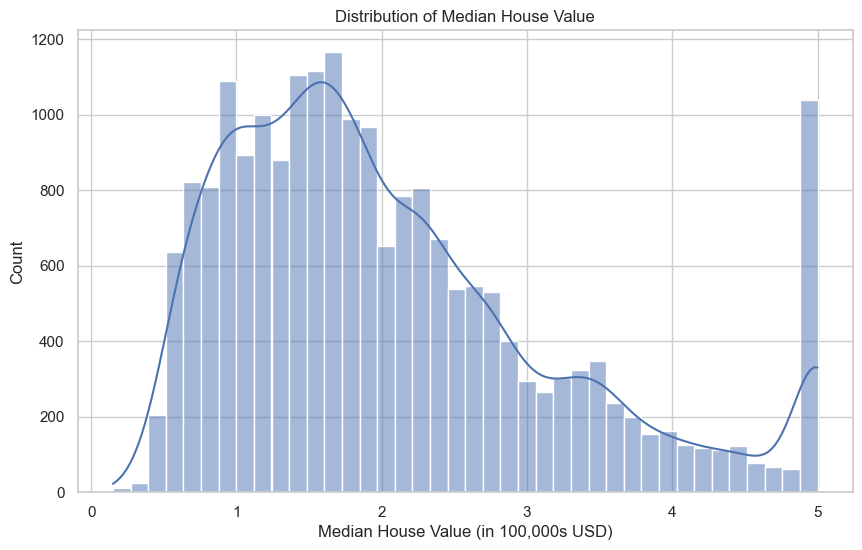

In [2]:
# Data Analysis 
df.info()
df.describe()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution of target variable
sns.histplot(df['MedHouseVal'], kde=True, bins=40)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value (in 100,000s USD)')
plt.show()

In [3]:
# preprocessing
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression RMSE: 0.75
Linear Regression MAE: 0.53
Linear Regression R²: 0.58


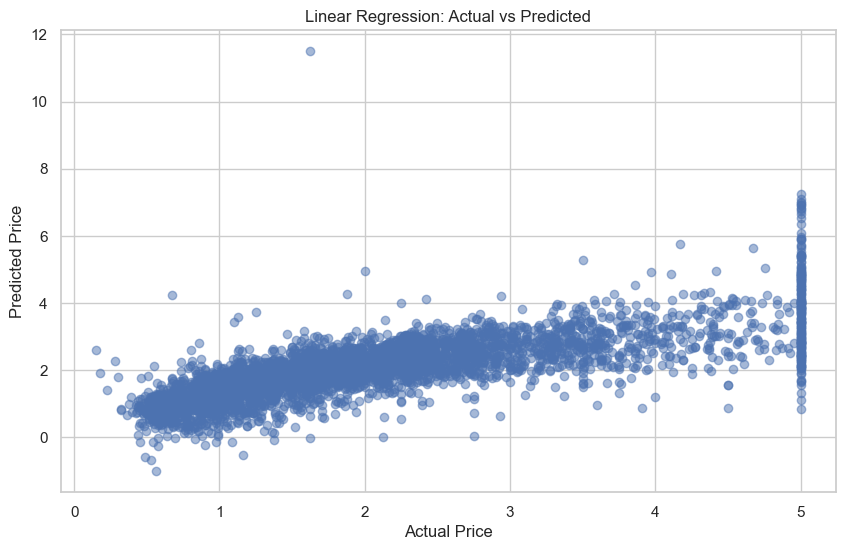

In [4]:
# Initialize and Linear regression train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression RMSE: {rmse_lr:.2f}')
print(f'Linear Regression MAE: {mae_lr:.2f}')
print(f'Linear Regression R²: {r2_lr:.2f}')

# Plot actual vs predicted
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

Random Forest RMSE: 0.51
Random Forest MAE: 0.33
Random Forest R²: 0.81


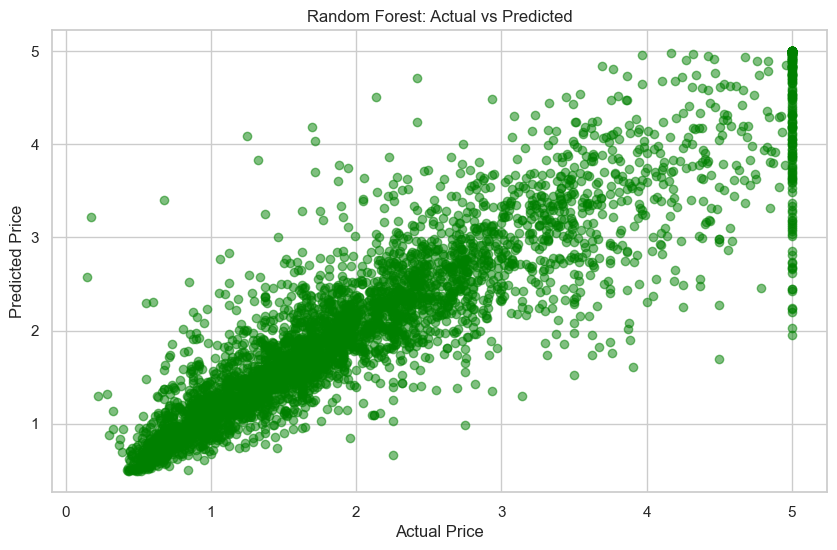

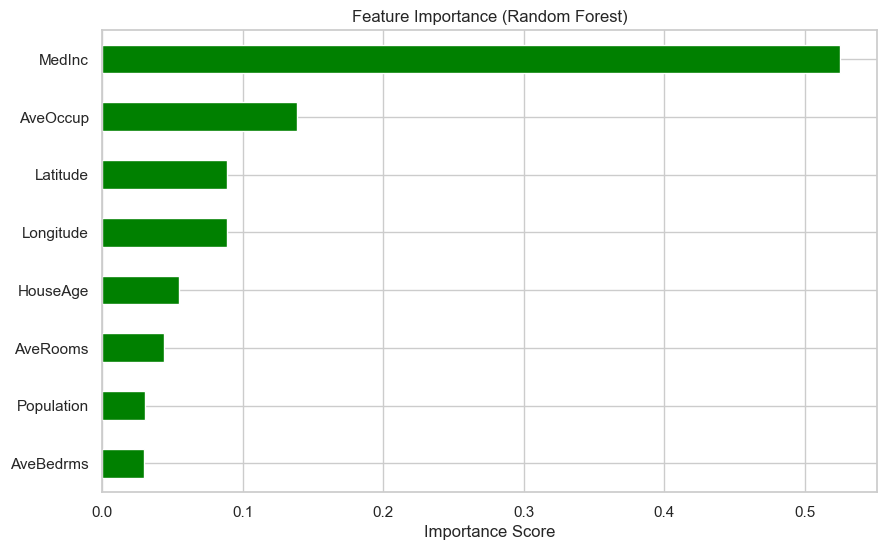

In [5]:
# Initialize and train Randomforestregressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf:.2f}')
print(f'Random Forest MAE: {mae_rf:.2f}')
print(f'Random Forest R²: {r2_rf:.2f}')

# Plot actual vs predicted
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

# Feature Importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

In [6]:
# Results summary
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf],
    'R²': [r2_lr, r2_rf]
})

results

,Model,RMSE,MAE,R²
0,Linear Regression,0.745581,0.533200,0.575788
1,Random Forest,0.505340,0.327543,0.805123
